# ADA Project : Dunnhumby dataset
## Tell me what you buy and I will tell you who you are



### Abstract
We would like to analyse the Dunnhumby dataset. Living in a time and age where every piece of our data is stored and analysed; and being active consumers ourselves, we would like to see what informations retail chains can gather and infer about us knowing only our shopping habits. As transactions over two years of several households and their basic demographic profiles are provided, we want to see if there are any links and correlations between specific demographics (e.g. marital status, income, number of children, etc) and purchase patterns. Furthermore, if time permits it, we want to see if we can create a model predicting a consumer demographic profile from their shopping. Thus, we would like to see how "easy" and how precise it actually is for retailers to infer who their customer is by what they buy and target them with specific marketing. Basically, we want to know how much of a target we actually are.

### Task 1: Clean up the data and prepare the sets we want to keep

In [46]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt

import os

In [8]:
os.getcwd()

'C:\\Users\\goffe\\Documents\\ada\\epfl-ada-2019-project-bubble582\\code'

In [11]:
'''As we said in the description of our project, we are going to concentrate on 3 of the 8 tables :
- hh_demographic.csv
- transaction_data.csv
- product.csv
In this first step, we want to load the data, and prepare it for the analysis'''

#load the data
hh_demographic = pd.read_csv('../data/dunnhumby_complete_csv/hh_demographic.csv', sep = ',')
transaction_data = pd.read_csv('../data/dunnhumby_complete_csv/transaction_data.csv', sep = ',')
product = pd.read_csv('../data/dunnhumby_complete_csv/product.csv', sep = ',')

#### Data exploration

In [30]:
transaction_data.head(4)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.0,1631,1,0.0,0.0


In [31]:
hh_demographic.head(4)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13


In [32]:
product.head(4)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ


In [24]:
transaction_data.groupby('household_key').count().describe()

,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1038.292800,1038.292800,1038.292800,1038.292800,1038.292800,1038.292800,1038.292800,1038.292800,1038.292800,1038.292800,1038.292800
std,999.097354,999.097354,999.097354,999.097354,999.097354,999.097354,999.097354,999.097354,999.097354,999.097354,999.097354
min,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
25%,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
50%,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
75%,1454.500000,1454.500000,1454.500000,1454.500000,1454.500000,1454.500000,1454.500000,1454.500000,1454.500000,1454.500000,1454.500000
max,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000,6851.000000


For the table *transaction_data*, we have the values of the transactions for 2500 different households. It would be interesting to know if we have the demographic data for all the households or not.

In [20]:
hh_demographic.household_key.is_unique

True

We don't have doublets in the table, meaning that one household has exactly one row. 

In [22]:
hh_demographic.describe()

,household_key
count,801.000000
mean,1235.176030
std,736.804647
min,1.000000
25%,596.000000
50%,1218.000000
75%,1914.000000
max,2499.000000


But in this table, we have only 801 rows, meaning that out of the 2500 household represented in the table *transaction_data*, we have the demographic data only for one third of them. This is something we should keep in mind later on if we want for example to merge the tables on the *household_key* column, and decide if we want to keep all the household, thus introducing missing data, or if we want to continue only with one third of the households for our study.

In [27]:
product.PRODUCT_ID.is_unique

True

In [29]:
product.describe()

,PRODUCT_ID,MANUFACTURER
count,9.235300e+04,92353.00000
mean,5.328353e+06,1739.22833
std,5.359937e+06,1818.26957
min,2.567100e+04,1.00000
25%,9.706280e+05,328.00000
50%,1.621091e+06,1094.00000
75%,9.704770e+06,2264.00000
max,1.831630e+07,6477.00000


In the table *product*, there are no doublets for the products, each product is represented once, and we have its characteristics described in the corresponding row. There are 92 353 products. As for the households, we can investigate whether all the products are represented in the *transaction_data* table.

In [28]:
transaction_data.groupby('PRODUCT_ID').count().describe()

,household_key,BASKET_ID,DAY,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,92339.000000,92339.000000,92339.000000,92339.000000,92339.000000,92339.000000,92339.000000,92339.000000,92339.000000,92339.000000,92339.000000
mean,28.110896,28.110896,28.110896,28.110896,28.110896,28.110896,28.110896,28.110896,28.110896,28.110896,28.110896
std,191.960855,191.960855,191.960855,191.960855,191.960855,191.960855,191.960855,191.960855,191.960855,191.960855,191.960855
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,29778.000000,29778.000000,29778.000000,29778.000000,29778.000000,29778.000000,29778.000000,29778.000000,29778.000000,29778.000000,29778.000000


There are 92 339 products represented in the *transaction_data* table, meaning that only 14 are not represented. We can more easily imagine to do an inner join, and just drop those 14 products. 

#### Some plots

In [43]:
hh_demographic.groupby('AGE_DESC').count()

,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
AGE_DESC,,,,,,,
19-24,46,46,46,46,46,46,46
25-34,142,142,142,142,142,142,142
35-44,194,194,194,194,194,194,194
45-54,288,288,288,288,288,288,288
55-64,59,59,59,59,59,59,59
65+,72,72,72,72,72,72,72


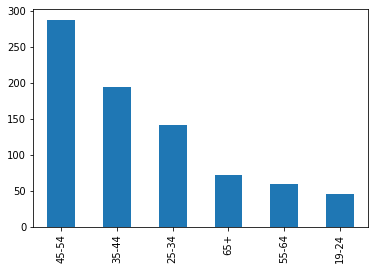

In [69]:
hh_demographic['AGE_DESC'].value_counts().plot(kind='bar')

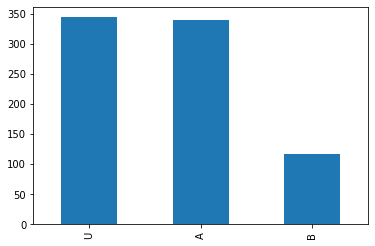

In [70]:
hh_demographic['MARITAL_STATUS_CODE'].value_counts().plot(kind='bar')

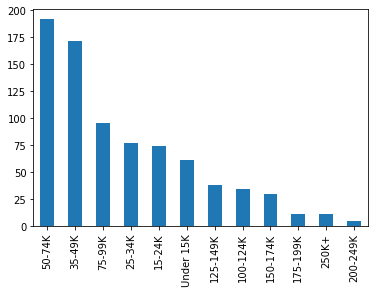

In [71]:
hh_demographic['INCOME_DESC'].value_counts().plot(kind='bar')

PS:
- we should continue to make some plots
- we should order the categories when it makes sense, so that the plots are more meaningful